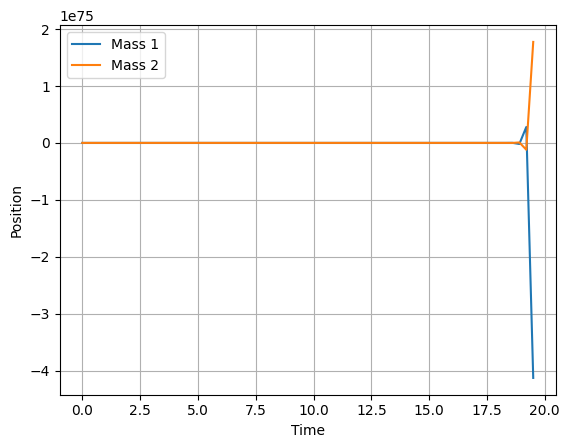

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m1 = 0.1  # mass of the first particle
m2 = 0.2  # mass of the second particle
k1 = 10  # elasticity coefficient 1
k2 = 8  # elasticity coefficient 2
k3 = 12  # elasticity coefficient 3
b1 = 0.2  # damping coefficient 1
b2 = 0.1  # damping coefficient 2
A = 1.0 # force amplitude
w = 2.0  # oscillating constant omega
L1 = 0.5  # equilibrium length 1
L2 = 1.0  # equilibrium length 2
L3 = 0.6  # equilibrium length 3
dt = 0.1 # Time step
num_steps = 200 # Number of simulation steps

# Initialize variables
t = np.zeros(num_steps)    # Time array
x1 = np.zeros(num_steps)   # Position of mass 1
x2 = np.zeros(num_steps)   # Position of mass 2
v1 = np.zeros(num_steps)   # Velocity of mass 1
v2 = np.zeros(num_steps)   # Velocity of mass 2

# Initial conditions
x1[0] = 0.5
x2[0] = 0.0

# Verlet method
for i in range(1, num_steps):
    t[i] = i * dt

    # Compute forces
    F1 = (-1)*(k1 * (x1[i-1] - L1) - k2 * (x2[i-1] - x1[i-1] - L2) + b1 * v1[i-1] - A * np.sin(w * t[i-1]))
    F2 = (-1)*(k2 * (x2[i-1] - x1[i-1] - L2) + k3 * (x2[i-1] - L3) + b2 * v2[i-1])

    # Update positions
    x1[i] = x1[i-1] + v1[i-1] * dt + 0.5 * F1 / m1 * dt**2
    x2[i] = x2[i-1] + v2[i-1] * dt + 0.5 * F2 / m2 * dt**2

    # Compute new forces with updated positions
    F1_new = (-1)*(k1 * (x1[i] - L1) - k2 * (x2[i] - x1[i] - L2) + b1 * v1[i-1] - A * np.sin(w * t[i]))
    F2_new = (-1)*(k2 * (x2[i] - x1[i] - L2) + k3 * (x2[i] - L3) + b2 * v2[i-1])

    # Update velocities
    v1[i] = v1[i-1] + 0.5 * (F1 + F1_new) / m1 * dt
    v2[i] = v2[i-1] + 0.5 * (F2 + F2_new) / m2 * dt

# Plotting the results
plt.plot(t, x1 + L1, label='Mass 1')
plt.plot(t, x2 + L1 + L2, label='Mass 2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()



plt.show()